In [1]:
# configuration
import matplotlib
import pandas as pd
import skore
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from skore import CrossValidationReport
from skrub import TableReport, tabular_learner
from skrub.datasets import fetch_employee_salaries

In [2]:
skore.show_versions()


System:
    python: 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 10:07:17) [Clang 14.0.6 ]
executable: /Users/sylvaincom/Documents/GitHub/skore-user-test/.venv/bin/python
   machine: macOS-15.1.1-arm64-arm-64bit

Python dependencies:
        skore: 0.6.1
          pip: 25.0
   setuptools: None
    diskcache: 5.6.3
      fastapi: 0.115.7
       joblib: 1.4.2
   matplotlib: 3.10.0
        numpy: 2.2.2
       pandas: 2.2.3
       plotly: 5.24.1
      pyarrow: 19.0.0
         rich: 13.9.4
 scikit-learn: 1.6.1
        skops: 0.11.0
      uvicorn: 0.34.0


In [3]:
matplotlib.rcParams["figure.dpi"] = 100

# Loading the data

In [4]:
datasets = fetch_employee_salaries()
df, y = datasets.X, datasets.y

In [5]:
TableReport(df)

Processing column   8 / 8


,,,,,,,,


In [6]:
TableReport(pd.DataFrame(y))

Processing column   1 / 1


<TableReport: use .open() to display>

# Defining a baseline model

In [7]:
model = tabular_learner("regressor")

In [8]:
model

Pipeline(steps=[('tablevectorizer',
                 TableVectorizer(high_cardinality=MinHashEncoder(),
                                 low_cardinality=ToCategorical())),
                ('histgradientboostingregressor',
                 HistGradientBoostingRegressor())])

# Get a report on cross-validation

In [9]:
cv_report = CrossValidationReport(model, df, y)

# Display the help tree to see all the insights that are available to you
cv_report.help()

Output()

╭───────────── Tools to diagnose estimator HistGradientBoostingRegressor ──────────────╮
│ report                                                                               │
│ ├── .metrics                                                                         │
│ │   ├── .r2(...)               (↗︎)     - Compute the R² score.                       │
│ │   ├── .rmse(...)             (↘︎)     - Compute the root mean squared error.        │
│ │   ├── .custom_metric(...)            - Compute a custom metric.                    │
│ │   ├── .report_metrics(...)           - Report a set of metrics for our estimator.  │
│ │   └── .plot                                                                        │
│ │       └── .prediction_error(...)     - Plot the prediction error of a regression   │
│ │           model.                                                                   │
│ ├── .cache_predictions(...)            - Cache the predictions for sub-estimators    │
│ │   reports.                                                                         │
│ ├── .clear_cache(...)                  - Clear the cache.                            │
│ └── Attributes                                                                       │
│     ├── .X                                                                           │
│     ├── .y                                                                           │
│     ├── .estimator_                                                                  │
│     ├── .estimator_name_                                                             │
│     ├── .estimator_reports_                                                          │
│     └── .n_jobs                                                                      │
│                                                                                      │
│                                                                                      │
│ Legend:                                                                              │
│ (↗︎) higher is better (↘︎) lower is better                                             │
╰──────────────────────────────────────────────────────────────────────────────────────╯

In [10]:
cv_report.metrics.report_metrics()

Output()

Metric                                   R² (↗︎)     RMSE (↘︎)
HistGradientBoostingRegressor Split #0  0.893704   9388.133344
                              Split #1  0.892791  10095.639084
                              Split #2  0.922826   8142.264422
                              Split #3  0.923191   7915.577795
                              Split #4  0.921627   7833.247027

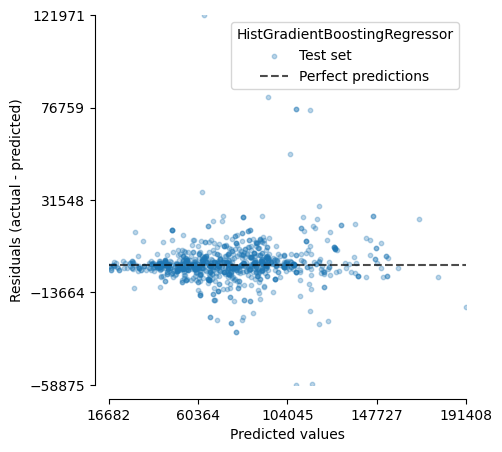

In [11]:
cv_report.estimator_reports_[0].metrics.plot.prediction_error();

# Your turn to play with the `EstimatorReport`

Some ideas
- benchmark several models on previous datasets
- load a dataset of your choice

In [12]:
# your code here